# rozważamy model "zombie invasion model"

# model ten opisują trzy równania:
dS/dt=pi-beta*delta*Z-delta*S  ->zmienność populacji ludzi zdrowych(podatnych)
dZ/dt=beta*S*Z+zeta*R-alpha*Z*S  ->zmienność populacji zombie
dR/dt=delta*S+alpha*Z*S-zeta*R  ->zmienność populacji martwych osobników

# potrzebujemy kilku zmiennych:
pi-wsp narodzin-0
delta-wsp smiertelnosci-1.e^-4
zeta-wsp wskrzeszenia jako zombie-1.e^-4
beta-wsp. zostania zombie po kontakcie z zombie-9.5e^-3
alpha-wsp destrukcji zombie-1.e^-4

# potrzebujemy też danych początkowych:
S0-początkowa liczba ludzi zdrowych/podatnych
R0-początkowa liczba martwych osobników
Z0-początkowa liczba zombie
## zmienianie tych zmiennych powoduje zmienianie się wykresu

In [1]:
#importujemy biblioteki potrzebne
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#implementujemy rownania w formie funkcji
def zombie(y,t,pi,delta,zeta,beta,alpha,):
    S,Z,R=y
    ds_dt=pi-beta*S*Z-delta*S
    dz_dt=beta*S*Z+zeta*R-alpha*Z*S
    dr_dt=delta*S+alpha*Z*S-zeta*R
    return[ds_dt,dz_dt,dr_dt]

In [3]:
#opisujemy zmienne i dajemy im jakies wartosci
pi=2
delta=1.e-4
zeta=1.e-4
beta=0.002
alpha=0.0002
S0=1000
Z0=0
R0=0
t=np.linspace(0,20,100000)#opisujemy parametr czasu
y0=[S0,Z0,R0]#opisujemy wektor początkowy

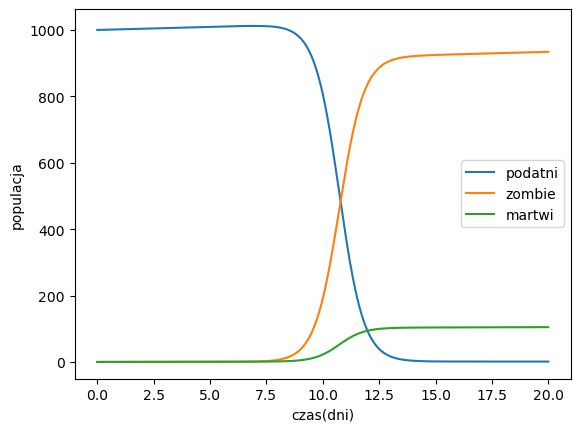

In [4]:
#robimy ploty
sol=odeint(zombie,y0,t,args=(pi,delta,zeta,beta,alpha))
plt.plot(t,sol[:,0],label="podatni")
plt.plot(t,sol[:,1],label="zombie")
plt.plot(t,sol[:,2],label="martwi")
plt.xlabel("czas(dni)")
plt.ylabel("populacja")
plt.legend()
plt.show()

## dzięki duzej ilosci punktow i malej liczby dni mamy bardziej "łagodny" wykres
## widzimy, że przez to jak wysoki jest współczynnik urodzeń, wykres podatnych minimalnie rośnie na początku

## wykresy podatnych i zombie się (prawie) wzajemnie odzwierciedlają. 
Warto zauważyć, że suma zawsze pozostaje taka sama (gdyby wyłączyć z wykresu współczynnik "martwi", otrzymalibyśmy idealne
wręcz odzwierciedlenie między stosunkiem "podatni" a "zombie".

## Można z tego wywnioskować, że zombie =/= człowiek.
Lifechanging.